<a href="https://colab.research.google.com/github/melisa9999/Scraping/blob/main/TableTennis_country_world_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.ittf.com/2021-ittf-table-tennis-world-ranking/'
page = requests.get(URL)  
soup = BeautifulSoup(page.content, 'html.parser') 

In [4]:
# Gets a list of links that leads to each week's ranking

main_content= soup.find(class_="container main-content")
week_info = main_content.find_all(class_="col-xs-12")
link_per_week_list= [week_info[1].find_all('li')[::8][i].find('a', href=True)['href'] for i in range(10)]


In [6]:
import pandas as pd

def week_position_table(link_per_week):
  """
  Builds a ranking table (dataFrame) with each week's link 

  input= string with week's URL 

  output= week_position_table[Rank, Country, Name, Score] (dataFrame)
  """
  URL = link_per_week
  page = requests.get(URL) 
  soup = BeautifulSoup(page.content, 'html.parser')
  
  players= soup.tbody 
  lista_players = players.find_all(class_='rrow') 
  
  names= [lista_players[name].find_all('td')[1].text for name in range(len(lista_players))]
  countries= [lista_players[country].find_all('td')[2].text for country in range(len(lista_players))]
  scores =[int(lista_players[score].find_all('td')[3].text) for score in range(len(lista_players))]
  ranks= [position for position in range(1,len(lista_players)+1)]
  
  return pd.DataFrame({"Rank position":ranks,"Names": names,"Country": countries,"Score": scores})



In [7]:


def week_country_rank(link_per_week_list, week_number, first_places):

  """
  INPUT:

  link_per_week_list (list): 10 links of week's rankings
  week_number (int): Position's week
  first_places (int): number of first countries in the rankings 

  OUTPUT
  rank_country_table (DataFrame): Table with countries and mean score of the country's players 

  """

  df= week_position_table(link_per_week_list[week_number])

  rank_country_table= df[['Country', 'Score']].groupby("Country").mean().sort_values(['Score'], ascending=False)

  return rank_country_table.reset_index()[:first_places+1]


In [8]:
"""
Bar diagraman with Mean Score per country 
"""

import plotly.express as px
data = px.data.gapminder()
df= week_country_rank(link_per_week_list, 1, 20)
fig = px.bar(df, x='Country', y='Score',
             hover_data=['Score'], color='Score', height=500)
fig.show()

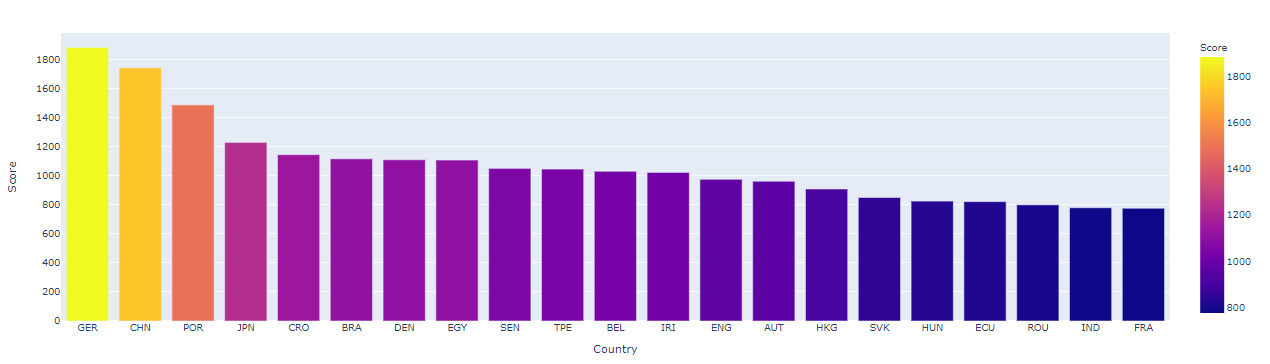